# Linear Discriminant Analysis 

In [1]:
import numpy as np 

from pylearn_ml191.dimentional_reduction import LDA
from sklearn.datasets import fetch_mldata

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline 

# Fixed random seed 
np.random.seed(21)

import warnings 
warnings.filterwarnings("ignore")

## 1. Data Generation

In [2]:
means = [[0, 5], [5, 0]]
cov0 = [[4, 3], [3, 4]]
cov1 = [[3, 1], [1, 1]]
N0 = 50
N1 = 50
N = N0 + N1
X0 = np.random.multivariate_normal(means[0], cov0, N0) 
X1 = np.random.multivariate_normal(means[1], cov1, N1)
y0 = np.zeros((N0, ))
y1 = np.ones((N1, ))

In [3]:
X = np.concatenate([X0, X1], axis=0)
y = np.concatenate((y0, y1), axis=0)

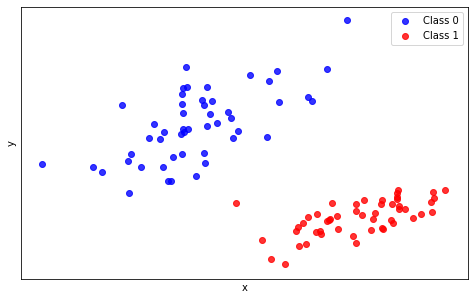

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(X0[:,0], X0[:,1], c='blue', alpha=0.8, label='Class 0')
plt.scatter(X1[:,0], X1[:,1], c='red', alpha=0.8, label='Class 1')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

## 2. Linear Discriminant Analysis

### 2.1 Using LDA in pylearn_ml191

In [5]:
lda = LDA(n_components=1)
lda.fit(X, y)
w_pylearn_ml191 = lda.W

### 2.2 Using LDA in sklearn

In [6]:
sklearn_lda = LinearDiscriminantAnalysis(n_components=1, solver="eigen")
sklearn_lda.fit(X, y)
w_sklearn = sklearn_lda.coef_ / np.linalg.norm(sklearn_lda.coef_)

In [7]:
print("===================================================================")
print("Nghiệm từ thư viện pylearn_ml191: ", w_pylearn_ml191)
print("Nghiệm từ thư viện sklearn: ", w_sklearn)
print("===================================================================")

Nghiệm từ thư viện pylearn_ml191:  [[-0.60810442  0.79385705]]
Nghiệm từ thư viện sklearn:  [[ 0.60810442 -0.79385705]]


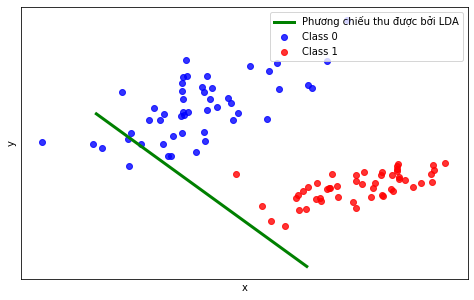

In [8]:
# Visualization 

plt.figure(figsize=(8,5))
plt.scatter(X0[:,0], X0[:,1], c='blue', alpha=0.8, label='Class 0')
plt.scatter(X1[:,0], X1[:,1], c='red', alpha=0.8, label='Class 1')
plt.plot([-6 * w_pylearn_ml191[0, 0], 6 * w_pylearn_ml191[0, 0]], 
         [-6 * w_pylearn_ml191[0, 1], 6 * w_pylearn_ml191[0, 1]], 'g', linewidth=3, label = 'Phương chiếu thu được bởi LDA')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([])
plt.yticks([])
plt.legend(loc='upper right')
plt.show()


## 3. LDA in Iris dataset

In [9]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

LDA from pylearn_ml191: 


<Figure size 432x288 with 0 Axes>

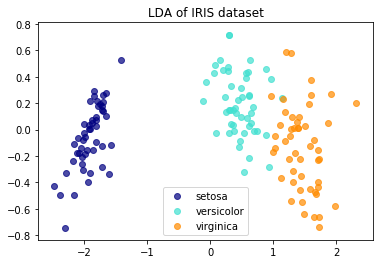

In [10]:
print("LDA from pylearn_ml191: ")
print("=======================")

lda = LDA(n_components=2)
X_new = lda.fit_transform(X, y)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_new[y == i, 0], X_new[y == i, 1], alpha=.7, c=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

LDA from sklearn:


<Figure size 432x288 with 0 Axes>

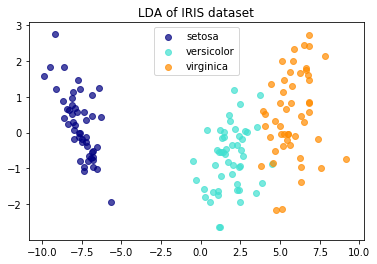

In [11]:
print("LDA from sklearn:")
print("=================")

lda = LinearDiscriminantAnalysis(n_components=2)
X_new = lda.fit_transform(X, y)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_new[y == i, 0], X_new[y == i, 1], alpha=.7, c=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()